<a href="https://colab.research.google.com/github/Schwartz-Zha/DeepLearningSchool/blob/master/GEC_DeepLearning2_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Part 2 : Homework 1
## Neural Networks - CNNs and RNNs [60 pts]
**GEC Academy: Winter 2019**  
**Instructor**: Pavlos Protopapas,  
**TFs :** Patrick Ohiomoba, Srivatsan Srinivasan

---

### INSTRUCTIONS

- Please include the group number on the assignment
- Please also include the names of all collaborators.
- Make sure all work is contained in the submitted Jupyter Notebook
- Give credit to any  external sources such as blog posts, papers, and source code used in your answers. 
- Plagiarism in any form is not allowed.

---

**Names of all collaborators/group members: Tracy(Zhiqi Cui)**

**Group Number: 1**

## Problem 1: Convolutional Neural Network Basics  [10 pts]

In convolutional neural networks, a convolution is a multiplicative operation on a local region of values. Convolutional layers have been very useful in image classification, as it allows the network to retain local spatial information for feature extraction.

### Part A: Understanding Convolutional Operations [2 pts]

For the following 2D matrix:

$$
\left( \begin{array}{ccc}
2 & 3 & 2 \\
3 & 1 & 2 \\
4 & 1 & 0 
\end{array} \right)
$$

you will use the following 2x2 kernel to perform a 2D convolution operation.

$$
\left( \begin{array}{cc}
2 & 1 \\
1 & 2 
\end{array} \right)
$$

**1.A.1.** Compute this operation by hand assuming a stride of 1 and a) valid, b) same, and c) full border modes.  For each mode, indicate the shape of the the resulting (post-convolution) matrix and compare it to the shape of the original matrix.

*The solution I made is here*

a) valid
$$
\left( \begin{array}{ccc}
12 & 13  \\
13 & 5 
\end{array} \right)
$$
b) same
$$
\left( \begin{array}{ccc}
4 & 10 & 7 \\
8 & 12 & 13 \\
11 & 13 & 5 
\end{array} \right)
$$
c) full border
$$
\left( \begin{array}{ccc}
4 & 8 & 7 & 2\\
8 & 12 & 13 & 6\\
11 & 13 & 5 & 4\\
4 & 9 & 2 & 0
\end{array} \right)
$$

### Part B: Understanding Pooling Operations [2 pts]

Pooling operations are often used in convolutional neural networks to reduce the dimensionality of the feature maps as well as overall network complexity. Two main types of pooling are used in CNNs: AveragePooling and MaxPooling.

**1.B.1.** Using the matrix below, write the output of the AveragePooling and MaxPooling operations with pool size 2x2 and stride  2x2.

$$
\left( \begin{array}{cccc}
1 & 2 & 2 & 4 \\
3 & 1 & 2 & 1 \\
4 & 1 & 0 & 2 \\
5 & 2 & 2 & 1
\end{array} \right)
$$

**1. B.2.** Repeat 1.B.1 with a stride size  of 1.

*The solution I made is here*
*1.B.1*
pool size $2*2$ and tride size $2*2$

a) AveragePooling 
$$
\left( \begin{array}{ccc}
1.75 & 2.25  \\
3 & 1.25 
\end{array} \right)
$$

b) MaxPooling
$$
\left( \begin{array}{ccc}
3 & 4  \\
5 & 2 
\end{array} \right)
$$

*1.B.2*
pool size $2*2$ and stride size $1*1$

a) AveragePooling
$$
\left( \begin{array}{ccc}
1.75 & 1.75 & 2.25 \\
2.25 & 1 & 1.25\\
3 & 1.25 & 1.25
\end{array} \right)
$$

b) MaxPooling
$$
\left( \begin{array}{ccc}
3 & 2 & 4\\
4 & 2 & 2\\
5 & 2 & 2
\end{array} \right)
$$


### Part C: Puppy Example [6 pts]

Consider the following image of a dog:

![dog](https://upload.wikimedia.org/wikipedia/commons/f/fc/Kintamani_dog_white.jpg)

**1.C.1.** Load the image as a 2D Numpy array into the variable `dog_image_data`. Appropriately normalize the image data so that values within `dog_image_data` fall within [-0.5, 0.5].

**1.C.2.** Choose 4 3x3 convolution kernels (you can look up kernels for edge detection, blurring, sharpening, or even just generate random kernels) and use these kernels and convolve over the image with same border mode (try using  [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)).

**1.C.3.** In the resulting convolved image data matrices, set all pixel values less than zero to zero (using np.clip()). In other words:


`
if x < 0:
    x = 0
else:
    x = x
`

(This is the `ReLU` activation function.)

**1.C.4.** Plot the images.

**1.C.5.** Find 3 additional (similarly sized) images of dogs or cats (use Google Image Search if you don't find images via other alternatives).  Repeat steps 1.C.1-1.C.4 on these 3 images.  Feel free to store the image data for your additional images in different variables.

Take a moment to examine the convolved images. You should see that certain features in the puppy are accentuated, while others are de-emphasized. Now consider the effect of performing additional convolution operations on these filtered images and how to they relate to additional layers in a neural network.

/home/billyschwartz/.local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


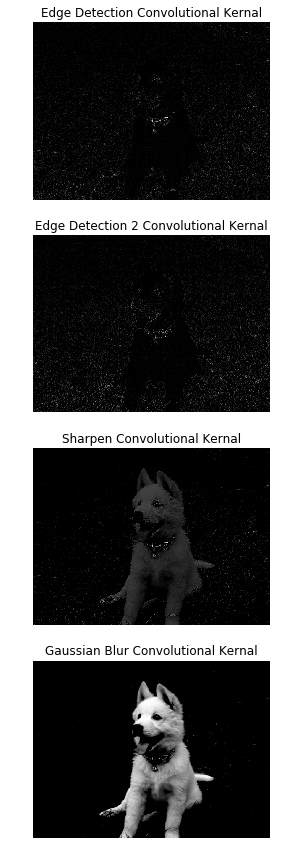

In [0]:
#1.C.1 load this image into a 2D Numpy array variable dog_image_data, then normalize it within [-0.5,0.5]

from skimage import io
#this simple line will load the jpeg image to numpy arrays and convert it into 2D with complex weight 
#assigned to each color
#and then also normalize it to [0,1]
dog_image_data = io.imread('https://upload.wikimedia.org/wikipedia/commons/f/fc/Kintamani_dog_white.jpg'
                           ,as_gray=True)
#Then we shift the result to [-0.5,0.5]
dog_image_data = dog_image_data - 0.5

#1.C.2 choose 4 3*3 convolutional kernels

from scipy import signal
import numpy as np
#set the filter

edge_detection = np.array([[ -1, -1, -1 ],
                   [-1 , 8 , -1 ],
                   [ -1 , -1 , -1 ]]) 
edge_detection2 = np.array([[ 0, 1, 0 ],
                   [1 , -4 , 1 ],
                   [ 0 , 1 , 0 ]])
sharpen = np.array([[ 0, -1, 0 ],
                   [-1 , 5 , -1 ],
                   [ 0 , -1 , 0 ]])
gaussian_blur = np.array([[ 1, 2, 1 ],
                   [2 , 4 , 2 ],
                   [ 1 , 2 , 1 ]])/16

#Convolutional Operation
image_filtered_edge_detection = signal.convolve2d(dog_image_data, edge_detection, 
                                                  mode='same', boundary='fill',fillvalue=0)
image_filtered_edge_detection2 = signal.convolve2d(dog_image_data, edge_detection2, 
                                                  mode='same', boundary='fill',fillvalue=0)
image_filtered_sharpen = signal.convolve2d(dog_image_data, sharpen, 
                                                  mode='same', boundary='fill',fillvalue=0)
image_filtered_gaussian_blur = signal.convolve2d(dog_image_data, gaussian_blur , 
                                                  mode='same', boundary='fill',fillvalue=0)
#1.C.3 in the result image matrix, conduct the relu operation

image_edge_detection_after_relu = np.clip(image_filtered_edge_detection,0,None)
image_edge_detection2_after_relu = np.clip(image_filtered_edge_detection2,0,None)
image_sharpen_after_relu = np.clip(image_filtered_sharpen,0,None)
image_gaussian_blur_after_relu = np.clip(image_filtered_gaussian_blur,0,None)

#plot the images
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax_edge, ax_edge2, ax_sharpen,ax_blur) = plt.subplots(4, 1, figsize=(6, 15))
ax_edge.imshow(image_edge_detection_after_relu, cmap='gray')
ax_edge.set_title('Edge Detection Convolutional Kernal')
ax_edge.set_axis_off()
ax_edge2.imshow(image_edge_detection2_after_relu, cmap='gray')
ax_edge2.set_title('Edge Detection 2 Convolutional Kernal')
ax_edge2.set_axis_off()
ax_sharpen.imshow(image_sharpen_after_relu, cmap='gray')
ax_sharpen.set_title('Sharpen Convolutional Kernal')
ax_sharpen.set_axis_off()
ax_blur.imshow(image_gaussian_blur_after_relu,cmap='gray')
ax_blur.set_title('Gaussian Blur Convolutional Kernal')
ax_blur.set_axis_off()
fig.show()

## Problem 2: Running a Convolutional Neural Network [20 pts] 

### Part A: Building the Model [5 pts]

In this  part, you will create a convolutional neural network using Keras to predict the type of object in an image. Load the [CIFAR-10](https://keras.io/datasets/#cifar10-small-image-classification) dataset, which contains 50,000 32x32 training images and 10,000 test images of the same size, with a total of 10 sizes.

Use a combination of the [following layers](https://keras.io/layers/convolutional/): Conv2D, MaxPooling2D, Dense, Dropout and Flatten Layers (not necessarily in this order).
You may use an existing architecture like AlexNet or VGG16, or create one of your own design. However, you should write your own layers and not use a pre-written implementation.

Convolutional neural networks are very computationally intensive. We highly recommend that you train your model on FloydHub using GPUs. On CPUs, this training can take up to several hours. On GPUs, it can be done within minutes.

** 2.A.1.** Report the total number of parameters in your model.

** 2.A.2.** How does the number of total parameters change (linearly, exponentially) as the number of filters per layer increases?

** 2.A.3.** Generate a plot showing the relationship in 2.A.2 and explain why.

You can approach the problems in this section by first assigning 32 filters to each Conv2D layer, then 64, 128, etc. and recording the total number of parameters for each model.





In [0]:
from keras.datasets import cifar10
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert to categorical
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Scale the data
x_train = x_train / 255 
x_test = x_test / 255  

#now build the model

import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3),strides=(1,1), activation='relu', input_shape=(32, 32, 3),padding='same',use_bias=True))
model.add(Conv2D(32, (3, 3),strides=(1,1), activation='relu',padding='same',use_bias=True))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3),strides=(1,1), activation='relu',padding='same',use_bias=True))
model.add(Conv2D(128, (3, 3),strides=(1,1), activation='relu', use_bias=True, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu',padding='same',use_bias=True))
model.add(Conv2D(256, (3, 3), activation='relu', use_bias=True, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 128)       36992     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 128)         0         
__________

**2.A.1**
The total parameters in my model is 2,309,226.
**2.A.2**
As the number of filters per layer increase, the total parameters increase exponentially.
**2.A.3**
Increase the number of filters per layer by one (from 32 to 64 for block 1, and from 128 to 160 for block 2.

X = range(1

### Part B: Training and Evaluating the Model [10 pts]
** 2.B.1.** Now train your model. You can choose to train your model for as long as you'd like, but you should aim for at least 10 epochs.  Your validation accuracy should exceed 70%. Training for 10 epochs on a CPU should take about 30-60 minutes.

In [14]:
model.fit(x_train, y_train, batch_size=32, epochs=10,validation_split=0.2)
print(model.evaluate(x_test, y_test, batch_size=32))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 32s 799us/step - loss: 1.0669 - acc: 0.6532 - val_loss: 0.8775 - val_acc: 0.7049
Epoch 2/10
40000/40000 [==============================] - 32s 796us/step - loss: 1.1138 - acc: 0.6402 - val_loss: 1.0305 - val_acc: 0.6588
Epoch 3/10
40000/40000 [==============================] - 32s 799us/step - loss: 1.1612 - acc: 0.6256 - val_loss: 1.0830 - val_acc: 0.6395
Epoch 4/10
40000/40000 [==============================] - 32s 797us/step - loss: 1.1912 - acc: 0.6176 - val_loss: 0.9156 - val_acc: 0.7087
Epoch 5/10
40000/40000 [==============================] - 32s 797us/step - loss: 1.2329 - acc: 0.6082 - val_loss: 0.9126 - val_acc: 0.7051
Epoch 6/10
40000/40000 [==============================] - 32s 800us/step - loss: 1.2481 - acc: 0.6004 - val_loss: 1.1379 - val_acc: 0.6078
Epoch 7/10
40000/40000 [==============================] - 32s 792us/step - loss: 1.3368 - acc: 0.5732 - val_loss: 1.

### Part C: Visualizing the Feature Maps [5 pts]

We would also like to examine the feature maps that are produced by the intermediate layers of the network.

**2.C.1.** Using your model, extract 9 feature maps from an intermediate convolutional layer of your choice and plot the images in a 3x3 grid.

**2.C.2.** Also plot your original input image (choose an image of your choice).

You may use the helper function `get_feature_maps()` to extract weights.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

def get_feature_maps(model, layer_id, input_image):
    model_ = Model(inputs=[model.input], outputs=[model.layers[layer_id].output])
    return model_.predict(np.expand_dims(input_image, axis=0))[0,:,:,:].transpose((2,0,1))

## Problem 3: Recurrent Neural Networks [30 pts]


### Part A: RNNs and its flavors - The whats and the whys. [10 pts]













    



#### 3.A.1.  Versatile RNNs [4 pts]

We learned multiple applications of RNNs over two weeks of lectures and labs - movie classification, entity tagging and numbers addition. Can you explain different RNN model constructions (One-to-One, Seq-to-Seq,Many-to-One,Many-to-Many etc.) using RNNs/LSTMs ? 
Note: We prefer that you use a mix of text explanations and drawings using tools online such as draw.io or even neat and well labeled hand drawn drawings should suffice . 

State some applications of these different RNN-based model constructions such as classification, translation etc. and explain why these applications benefit from such specific model constructions.


####  ANSWER HERE IN THIS CELL.


#### 3.A.2. "Vanishing" Vanishing Gradients [4 pts]
 
We know that conventional RNNs run into the problem of vanishing gradients. Explain why using simple derivative calculations and drawings. Using drawings and chain rule derivative calculations, can you briefly explain how LSTMs avoid the issue of vanishing gradients ? Feel free to consult sources/papers online, but <b> it is essential </b> that you cite your sources in your answer.

#### YOUR ANSWER HERE IN THIS CELL.

#### 3.A.3. To be or Not to Be  [2 pts]
For the following questions, answer **True** or **False** with a 1 or 2 line explanation of why 

a.) RNNs cannot handle input sequences of arbitrary lengths and hence we typically pad data to a fixed maximum length in our implementations.
        
b.) Vanishing gradient is a problem that happens only with RNNs and not other neural network architectures. (e.g. multi-layer feedforwards, CNNs etc.)
        
c.) Bidirectional LSTMs are expected to learn a sequence faster overall (in terms of the amount of training iterations required) but are computationally more expensive to propagate gradients than a simple LSTM.

d.) When using ReLU activation, it is advisable to re-scale the inputs closer to 0. 

#### YOUR ANSWER IN THIS CELL
a.)No. It's hard to give a direct judgement, because this is No in theory but Yes in practice.
I think RNN can handle different input sequences with various shapes, but fixing them into the same size is much much better for training. As GPU doesn't only train one by one, a fixed and neat tensor size is much much easier for GPU to do optimization for parallel computation.

I got this idea from https://datascience.stackexchange.com/questions/26366/training-an-rnn-with-examples-of-different-lengths-in-keras

b.)No. Actually this is a problem faced by any deep neural network. 
Specifically said, this is the Long-Term Dependencies problem exists in any gradient-based computational graph with a path consisting repeated multiplying by a matrix W. Either the eienvalue of matrix W is too big or too small will cause  the vanishing or exploding gradient problem.

Refer to *Deep Learning(Ian Goodfellow et al.)*

c.)Yes. Because Bidirectional LSTM not only add a whole new LSTM, which means doubling the computation cost, but also needs to store at least double  variables in stages. And also a Bidirectional LSTM has a more complicated layer(maybe Dense layer) to process the outputs of two LSTM. So this model is much more complicated than normal LSTM and should have a better performance on learning, and there is no wonder that the computational expense is much higher.

d.)Yes. That's why we scale the data in our input like this. **x_train = x_train / 255 **

And this is because we usually assign a very small step parameter $\lambda$ for gradient descent. And if the input number is too big, it will take much more iterations to reach 0, and only when about 50% neurons reach 0 (called deactive) can we say this model has been trained enough. So a very huge input scale will mean that the model takes much more time doing meaningless gradient descent on positive part on real number axis.

### Part B:   Language Models using LSTMs [20 pts]

*Green Eggs and Ham* is a best-selling and critically acclaimed children's book by Dr. Seuss, first published on August 12, 1960.   It's one of the most popular books in the English language.  According to Wikipedia:

> By 2001, it had become the fourth-best selling English-language children's hardcover book of all time. As of 2014, the book has sold 8 million copies. In 1999 the National Education Association (NEA) conducted an online survey of children and teachers, seeking the 100 most popular children's books. The children ranked Green Eggs and Ham third, just above another Dr. Seuss book, The Cat in the Hat.

In addition to being wildly popular, *Green Eggs and Ham* has a famously limited vocabulary.  

> *Green Eggs and Ham* is one of Seuss's "Beginner Books", written in a very simple vocabulary for beginning readers. The vocabulary of the text consists of just 50 words and was the result of a bet between Seuss and Bennett Cerf, Dr. Seuss's publisher, that Seuss (after completing The Cat in the Hat using 236 words) could not complete an entire book without exceeding that limit. The 50 words are: a, am, and, anywhere, are, be, boat, box, car, could, dark, do, eat, eggs, fox, goat, good, green, ham, here, house, I, if, in, let, like, may, me, mouse, not, on, or, rain, Sam, say, see, so, thank, that, the, them, there, they, train, tree, try, will, with, would, you.

We will provide you the entire text of the book (formatted to remove punctuation marks) in the file greeneggs.txt.   Your task will be to use an RNN (and in particular an LSTM RNN architecture)  to create a [language model](https://www.cs.bgu.ac.il/~elhadad/nlp18/nlp02.html) for generating natural language text in the style of *Green Eggs and Ham*.  Your model will take as input seed text and based on that seed, generate new text predictions.

#### 3.B.1. Creating your dataset [3 pts]

While there are different ways to generate a dataset from a text like *Green Eggs and Ham* we''re going to use the sentences in the text as a source of sequences with the label the next word in the sequence.  So from the sentence "That Sam I am" we will generate the following sequences, label pairings:

* Sequence: "That",  label: "Sam"
* Sequence: "That Sam",  label: "I"
* Sequence: "That Sam I",  label: "am"

This will allow us more flexible prediction of the next word(s) in a sentence.

**3.B.1.1.**  Read in the text from greeneggs.txt into the variable `corpus`.  You will use `corpus` to generate your dataset.

In [16]:
from google.colab import files
uploaded = files.upload()

Saving greeneggs.txt to greeneggs.txt


In [44]:
with open('greeneggs.txt') as file:
  lines = file.read().split('\n')
  corpus = []
  for line in lines:
    line_words = line.split(' ')
    corpus.append(line_words)
file.close()
from keras.preprocessing.text import Tokenizer
# tokenize the document
t = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False)
t.fit_on_texts(corpus)
print(t.word_counts)      #word_counts: A dictionary of words and their counts.
print("\n")
print(t.document_count)   #document_count:An integer count of the total number 
                          #of documents that were used to fit the Tokenizer.
print("\n")
print(t.word_index) #word_index: A dictionary of words and their uniquely assigned integers.
print("\n")
print(t.word_docs)  #word_docs: A dictionary of words and how many documents each appeared in.


OrderedDict([('i', 83), ('am', 15), ('sam', 18), ('that', 3), ('do', 36), ('not', 83), ('like', 44), ('you', 34), ('green', 10), ('eggs', 10), ('and', 24), ('ham', 10), ('them', 61), ('would', 26), ('here', 11), ('or', 8), ('there', 9), ('anywhere', 8), ('in', 40), ('a', 59), ('house', 8), ('with', 19), ('mouse', 8), ('', 20), ('eat', 24), ('box', 7), ('fox', 7), ('could', 14), ('car', 7), ('they', 2), ('are', 2), ('may', 4), ('will', 21), ('see', 4), ('tree', 6), ('let', 4), ('me', 4), ('be', 4), ('train', 9), ('on', 7), ('say', 5), ('the', 11), ('dark', 7), ('rain', 4), ('goat', 4), ('boat', 3), ('so', 5), ('try', 4), ('if', 1), ('good', 2), ('thank', 2)])


138


{'i': 1, 'not': 2, 'them': 3, 'a': 4, 'like': 5, 'in': 6, 'do': 7, 'you': 8, 'would': 9, 'and': 10, 'eat': 11, 'will': 12, '': 13, 'with': 14, 'sam': 15, 'am': 16, 'could': 17, 'here': 18, 'the': 19, 'green': 20, 'eggs': 21, 'ham': 22, 'there': 23, 'train': 24, 'or': 25, 'anywhere': 26, 'house': 27, 'mouse': 28, 'box': 29, 

**3.B.1.2.**  Convert your corpus into a  dataset of sentence sequences where each sentence sequence represents all the sequences generated from each sentence in the corpus in tokenized form.  Store your dataset of sequences as an np array in the variable `input_sequences`.  Make sure to add appropriate padding to your sequences so that they're all the same size.

In [49]:
print(corpus)
sentence_max_length = 0
for each in corpus:
  if len(each)> sentence_max_length: 
    sentence_max_length = len(each)
print(sentence_max_length)

input_sequences = []
for each_sentence in corpus:
  line = []
  for each_word in each_sentence:
    line.append(t.word_index[each_word])
  if len(line)<10:
    

[['I', 'am', 'Sam'], ['Sam', 'I', 'am'], ['That', 'Sam', 'I', 'am'], ['That', 'Sam', 'I', 'am'], ['I', 'do', 'not', 'like', 'that', 'Sam', 'I', 'am'], ['Do', 'you', 'like', 'green', 'eggs', 'and', 'ham'], ['I', 'do', 'not', 'like', 'them', 'Sam', 'I', 'am'], ['I', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham'], ['Would', 'you', 'like', 'them', 'here', 'or', 'there'], ['I', 'would', 'not', 'like', 'them', 'here', 'or', 'there'], ['I', 'would', 'not', 'like', 'them', 'anywhere'], ['I', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham'], ['I', 'do', 'not', 'like', 'them', 'Sam', 'I', 'am'], ['Would', 'you', 'like', 'them', 'in', 'a', 'house'], ['Would', 'you', 'like', 'them', 'with', 'a', 'mouse'], ['I', 'do', 'not', 'like', 'them', 'in', 'a', 'house'], ['I', 'do', 'not', 'like', 'them', 'with', 'a', 'mouse'], ['I', 'do', 'not', 'like', 'them', 'here', 'or', 'there'], ['I', 'do', 'not', 'like', 'them', 'anywhere'], ['I', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham'], ['I', 'do

**3.B.1.3.**  Generate from `input_sequences` your labeled dataset.  Store the sequences as an np array in the variable `sentences` and the labels as a keras categorical in the variable 'labels'.

#### 3.B.2. Creating your model [12 pts]

**3.B.2.1.** Create and train a Keras LSTM language model to the *Green Eggs and Ham* dataset you generated in Part A of this problem.  Make sure to take some steps to regularize your model. 

*    Without using model.summary(), explain how to calculate the number of parameters in each layer you are adding to the model. For LSTM param calculation, you can report the number of SimpleRNN params instead.
*   Report the model setup stating the intended effects of each component/layer and the chosen hyperparameters (and if possible a rationale for doing so).



#### 3.B.3. Predicting with your Model [5 pts]

**3.B.3.1.** Use your model to predict text by creating a function `predict_text` that takes two parameters as input.  The first parameter `seed_text` is the text sequence you'll use to seed your prediction.  The second parameter `word_number` is the number of words that you will predict to complete the sequence.

For example given predict_text("That Sam", 2) should generate an output like "That Sam I am".

**Hint ** : Think in an auto-regressive fashion. i.e. Use the first word's prediction as an addition to the seed input for predicting the next word.

**3.B.3.2.** What is the training set accuracy of your model? (You can calculate this accuracy on the sentences in your corpus)

**3.B.3.3. ** What is the output of your model on some sequences that aren't in the training set?  Generate 5 sequences that are not in the training set.  Do they seem in the same style as Dr. Seus's *Green Eggs and Ham*?

## Welcome the bots that can speak our language

In one part of this HW we gave you a glimpse into the world of language models.  It turns out that language models are becoming pervasive, finding applications in more and more places.  While deep learning has taken great strides forward in the last decade, language models (specifically deep language models) have in particular have shown stunning improvements.  One example of the recent improvements in language models can be found in the field of unsupervised text generation. OpenAI recently released a large-scale language model GPT-2 that is adept at writing newspaper articles at human-level fluency (unsupervised). Curious readers, dive deeper into the world of GPT-2 with this article.

https://blog.openai.com/better-language-models/